In [109]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df=pd.read_csv('/content/Iris.csv')

In [111]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [112]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [113]:
df.shape

(150, 6)

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [115]:
df.duplicated().sum()

0

In [116]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [117]:
df.isnull().sum().sum()

0

In [118]:
df.drop('Id',axis=1,inplace=True)

In [119]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [120]:
X=df.drop('Species',axis=1)
y=df['Species']

In [121]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [122]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [126]:
# One-hot encode the labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.values.reshape(-1,1))
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [128]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [129]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 3)
(30, 3)


In [130]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [131]:
# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Dropout

In [132]:

# Define the model
model = Sequential()

# Add an input layer
model.add(Input(shape=(4,)))

# Add hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))


# Add output layer
model.add(Dense(3, activation='softmax'))

In [133]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:

# Compile model (same as above)
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [135]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120, 3)


In [136]:
# Train the model
history = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.4242 - loss: 0.9711 - val_accuracy: 0.2500 - val_loss: 1.0626
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5194 - loss: 0.9180 - val_accuracy: 0.2917 - val_loss: 1.0181
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5281 - loss: 0.8961 - val_accuracy: 0.3750 - val_loss: 0.9753
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6514 - loss: 0.8500 - val_accuracy: 0.8333 - val_loss: 0.9353
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7881 - loss: 0.8136 - val_accuracy: 0.9167 - val_loss: 0.8971
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8286 - loss: 0.7657 - val_accuracy: 0.9167 - val_loss: 0.8621
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8428 - loss: 0.7528 - val_accuracy: 0.8750 - val_loss: 0.8310
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8494 - loss: 0.7059 - val_accuracy: 0.8750 - val_lo

In [141]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [143]:
history.history['accuracy']

[0.40625,
 0.4791666567325592,
 0.5520833134651184,
 0.6770833134651184,
 0.8020833134651184,
 0.8229166865348816,
 0.8541666865348816,
 0.8541666865348816,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8229166865348816,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8333333134651184,
 0.8541666865348816,
 0.8541666865348816,
 0.8645833134651184,
 0.8645833134651184,
 0.8645833134651184,
 0.

In [137]:
model.layers[0].get_weights()

[array([[ 2.08178714e-01,  2.49371305e-01, -2.15577587e-01,
         -1.13775261e-01,  6.16121441e-02, -4.06558037e-01,
         -4.41993400e-02,  1.18612051e-01, -3.23386878e-01,
          7.93391913e-02,  3.32787931e-01, -1.15876622e-01,
          1.71276435e-01,  3.80409583e-02, -1.80743877e-02,
          1.69333532e-01, -2.20989585e-01, -3.79749209e-01,
         -5.89096658e-02,  1.88158397e-02, -7.51964226e-02,
          2.28505000e-01, -1.53054804e-01, -3.08560193e-01,
          2.38959417e-01, -4.37714197e-02,  3.69295254e-02,
          4.83855866e-02,  6.37800172e-02,  3.34101945e-01,
          1.55016869e-01, -2.00098515e-01, -1.77910611e-01,
          5.58878891e-02, -1.84214532e-01,  5.32610416e-02,
         -7.22995028e-02, -1.88054442e-01,  3.36256102e-02,
         -2.44657233e-01,  3.23221609e-02, -2.30797589e-01,
         -1.82921603e-01, -3.77365053e-01, -3.16516384e-02,
         -1.96102530e-01, -1.57365128e-02,  7.07650557e-02,
          1.19810188e-02, -2.72261292e-0

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


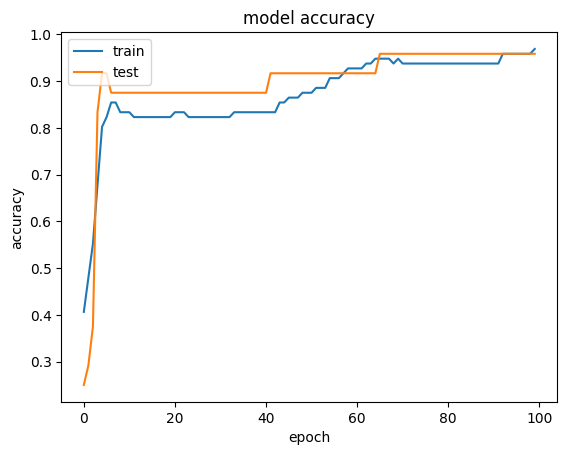

In [145]:
# list all data in history

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

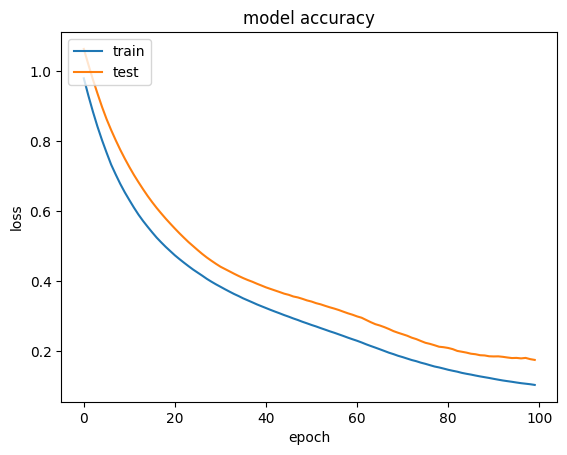

In [146]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [147]:
X_test.shape

(30, 4)

In [149]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [150]:
from sklearn.metrics import confusion_matrix

In [152]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


In [153]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


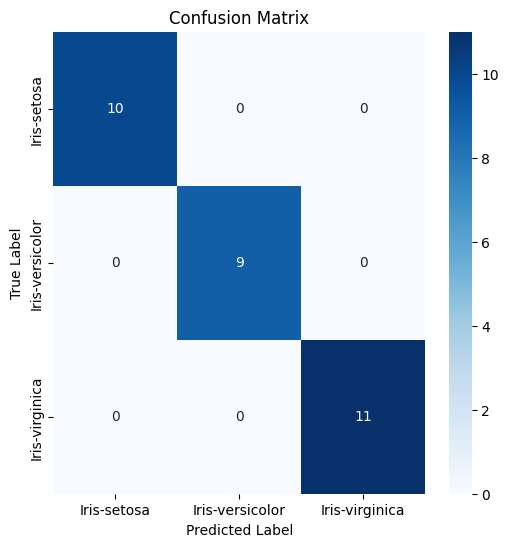

In [154]:
# Plot confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [155]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path

In [157]:
model.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2025_02_10_09_31_52_.h5


In [178]:
#hyperparameter tunig with keras tuner

!pip install keras-tuner --upgrade

In [179]:
from kerastuner.tuners import RandomSearch

# parameter tuning

In [180]:
def build_model(hp):
  model=Sequential()
  model.add(Dense(units=32,kernel_initializer = 'he_uniform',activation='relu',input_dim=4))
  model.add(Dense(units = 32, kernel_initializer = 'he_uniform',activation='relu'))
  model.add(Dense(3,activation='softmax'))
  optimizer=hp.Choice("optimizer",values=["adam","sgd","rmsprop","adadelta"])
  model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
  return model


In [181]:
tuner=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='iris_data')

In [182]:
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Trial 4 Complete [00h 00m 24s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 34s


In [183]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [184]:
mymodel=tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [185]:
mymodel.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

#parameter tunning-2

In [196]:
from tensorflow.keras import optimizers

def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(
        optimizer=optimizers.RMSprop(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [197]:
tuner_second=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project2',project_name='iris_data-2')

In [198]:
tuner_second.search(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Trial 5 Complete [00h 00m 20s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 01m 40s


In [199]:
tuner_second.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units_0': 416,
 'units_1': 416,
 'learning_rate': 0.0001,
 'units_2': 32,
 'units_3': 32}

In [200]:
classifier2=tuner_second.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [201]:
classifier2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 416)                 │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 416)                 │         173,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │          13,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 190,051 (742.39 KB)

 Trainable params: 190,051 (742.39 KB)

 Non-trainable params: 0 (0.00 B)